## Loading the Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d taweilo/loan-approval-classification-data

Dataset URL: https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data
License(s): apache-2.0
  0% 0.00/751k [00:00<?, ?B/s]
100% 751k/751k [00:00<00:00, 700MB/s]


In [ ]:
!unzip loan-approval-classification-data.zip

Archive:  loan-approval-classification-data.zip
  inflating: loan_data.csv           


## Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import  RandomForestClassifier

In [ ]:
df = pd.read_csv('/content/loan_data.csv')

## About the Dataset

In [ ]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


This dataset contains information about individuals applying for personal loans. It includes a variety of features, along with the loan details and the final loan status (approved: 1 or rejected: 0).
### Objective
The goal is to build a classification model to predict whether a loan application will be approved based on applicant information.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

### Checking Null Values

In [ ]:
df.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


### Checking Statistical summary

In [ ]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [ ]:
df.shape

(45000, 14)

In [ ]:
df.duplicated().sum()

np.int64(0)

### Distribution of Target variable

<Axes: xlabel='loan_status', ylabel='count'>

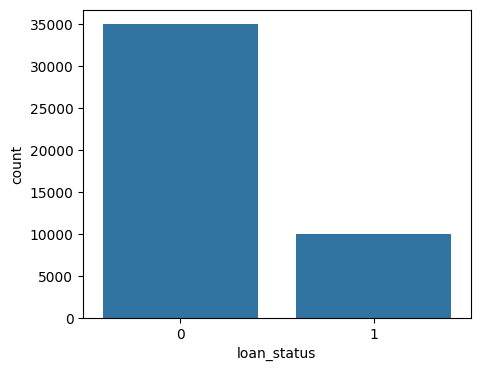

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x = 'loan_status', data = df)

### Boxplot for the outliers

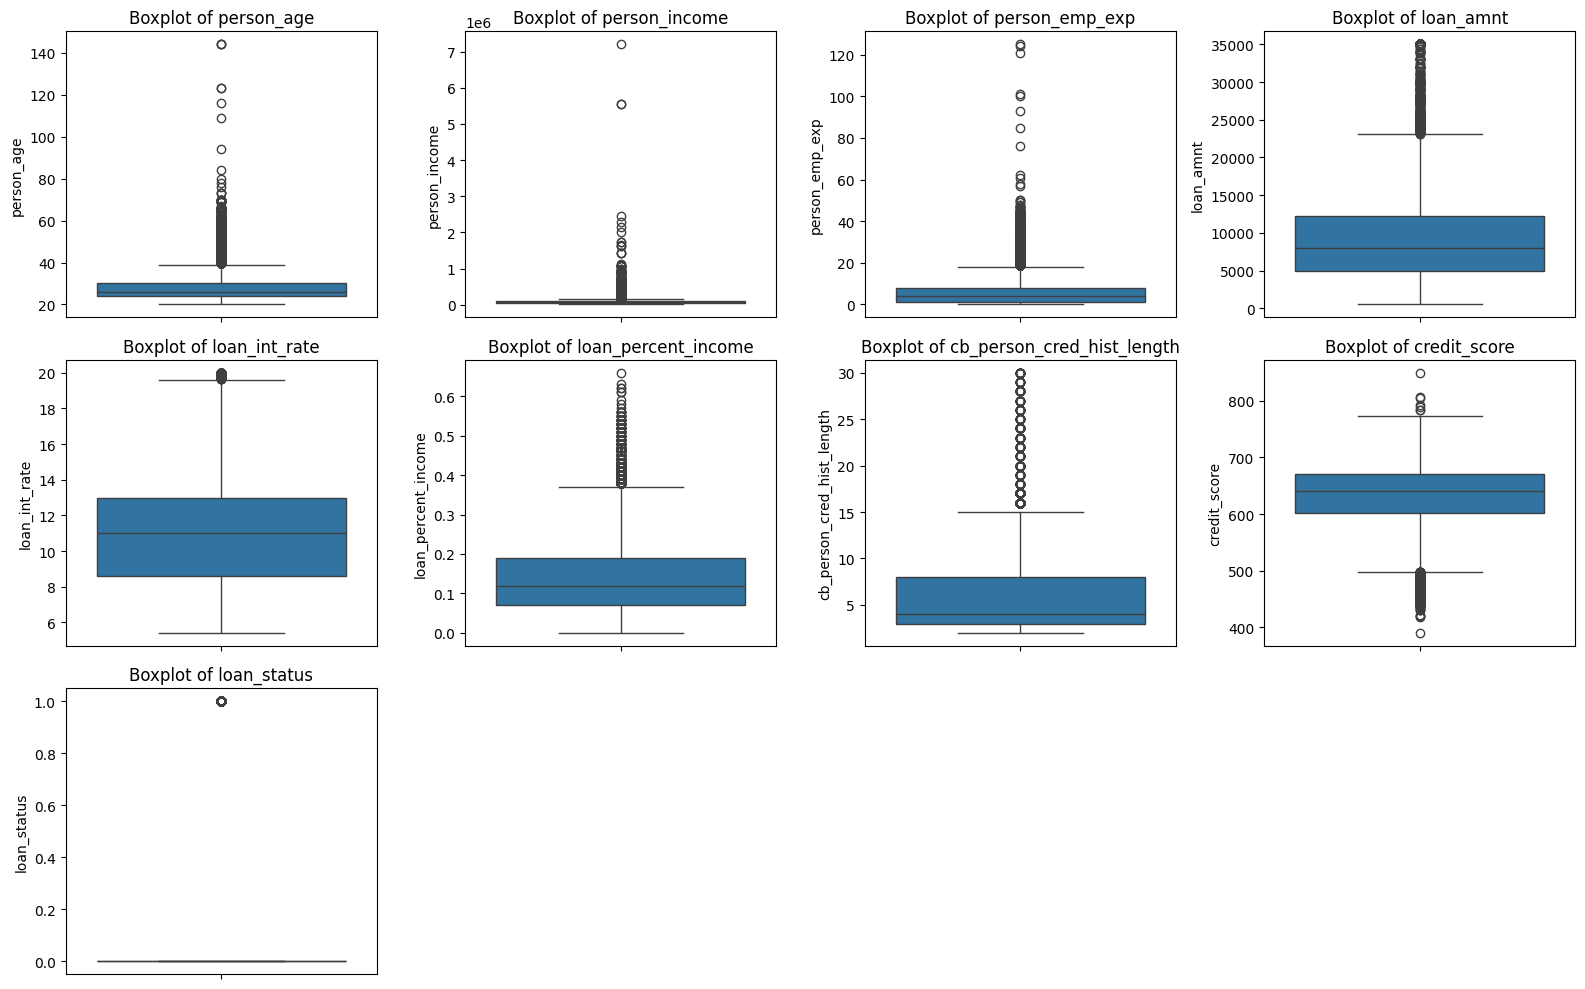

In [ ]:
num_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(16, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [ ]:
df_original = df.copy()

### Treating Outliers to mitiigate the impact of these

In [ ]:
columns_to_treat = ['person_age',	'person_income',	'person_emp_exp']

for col in columns_to_treat:
    Q1 = df_original[col].quantile(0.25)
    Q3 = df_original[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap using clip
    df_original[col] = df_original[col].clip(lower=lower_bound, upper=upper_bound)


In [ ]:
df_original.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

### Correlation matrix to analyze the relation between features

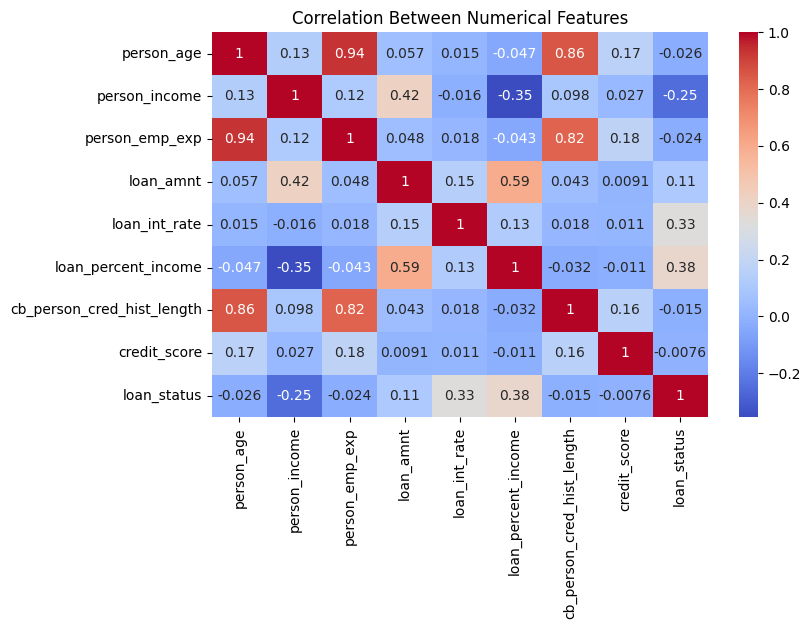

In [ ]:
plt.figure(figsize=(8, 5))
sns.heatmap(df_original.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numerical Features")
plt.show()

### Droping irrelevant features
They are not strongly related to the target variable that can help model to understand the important patterns

In [ ]:
df_original = df_original.drop(['person_age', 'cb_person_cred_hist_length', 'credit_score'], axis=1)

In [ ]:
df_original.shape

(45000, 11)

### Breaking the dataset

In [ ]:
X = df_original.drop(columns='loan_status', axis=1)
Y = df_original['loan_status']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.3, random_state=42)
# stratify will keep the ratio same of both the train and test data

In [ ]:
len(X_train)
len(X_test)

13500

### Encode the categorical columns
for both train and test data

In [ ]:
X_train_encode = pd.get_dummies(X_train, drop_first=True).astype(int)
X_test_encode = pd.get_dummies(X_test, drop_first=True).astype(int)

X_train_encode, X_test_encode = X_train_encode.align(X_test_encode, join='left', axis=1, fill_value=0)

### Analyzing the distribution of numerical columns
so that it would be easy to do scaling

/tmp/ipython-input-2159983890.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(X_train_encode[col], fill=True)


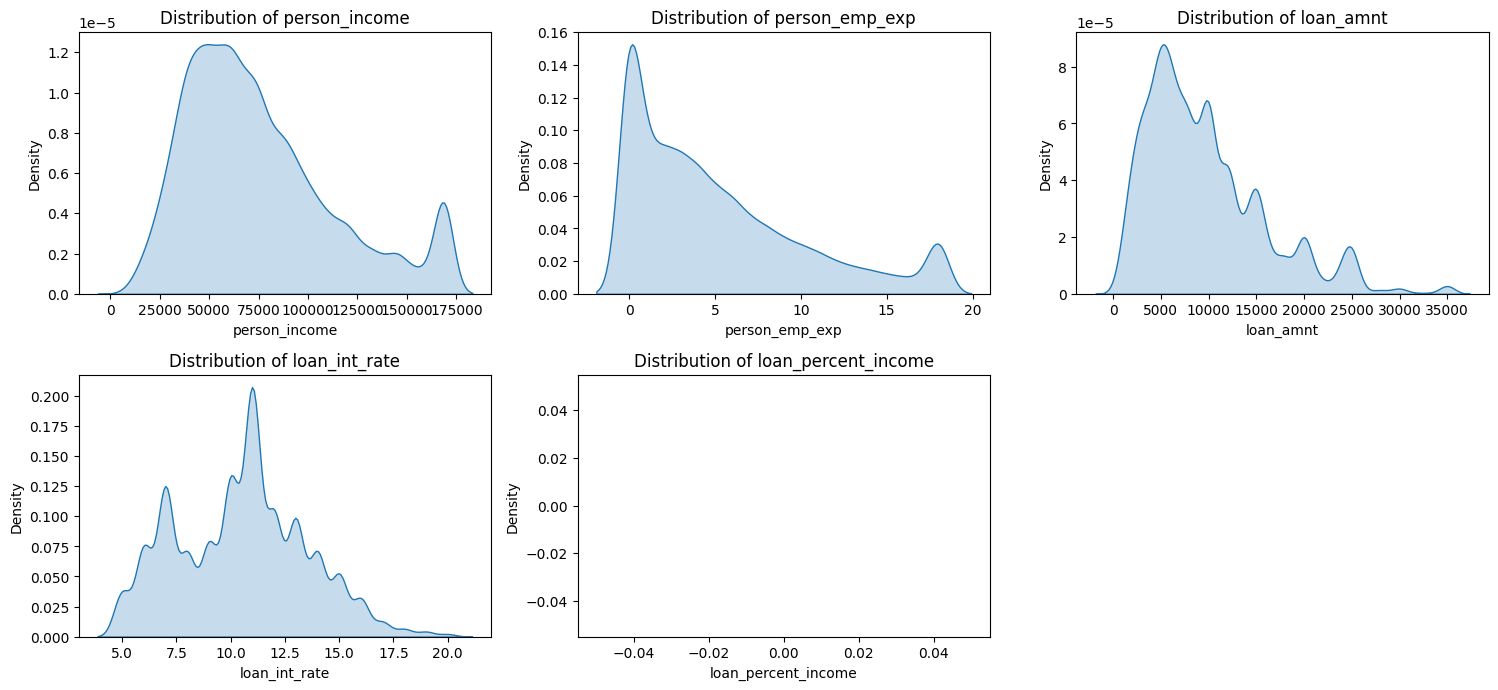

In [ ]:
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(X_train_encode[col], fill=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [ ]:
X_train[numeric_cols].skew().sort_values(ascending=False)

,0
loan_amnt,1.181776
person_emp_exp,1.077949
loan_percent_income,1.039668
person_income,0.870948
loan_int_rate,0.206424


### Scale the numerical features
Applying scalling technique depending on their skewness

In [ ]:
X_train_scaled = X_train_encode.copy()
X_test_scaled = X_test_encode.copy()
for col in numeric_cols:
  skewness = X_train_encode[col].skew()
  if abs(skewness) < 0.5:
    scaler = StandardScaler()
  elif abs(skewness) > 1.0 :
    scaler = RobustScaler()
  else:
    scaler = PowerTransformer(method='box-cox')

  X_train_scaled[col] = scaler.fit_transform(X_train_encode[[col]])
  X_test_scaled[col] = scaler.transform(X_test_encode[[col]])

In [ ]:
X_train_scaled.head()

,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,person_gender_male,person_education_Bachelor,person_education_Doctorate,person_education_High School,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
40335,-0.048302,1.428571,0.275862,-0.500123,0.0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
22386,-0.553855,0.428571,-0.137931,-1.832205,0.0,0,0,0,0,1,0,0,1,1,0,0,0,0,0
28223,1.260712,0.285714,1.379310,-0.167102,0.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0
2906,-0.865645,-0.428571,-0.575862,-1.166164,0.0,1,0,0,0,1,0,0,0,0,0,0,0,1,1
41710,-0.534575,0.285714,0.000000,-0.833143,0.0,1,0,0,0,1,0,1,0,0,1,0,0,0,1


In [ ]:
X_test_scaled.head()

,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,person_gender_male,person_education_Bachelor,person_education_Doctorate,person_education_High School,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
24782,0.589136,-0.142857,2.344828,0.831959,0.0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
43666,-0.419522,-0.285714,0.248828,0.831959,0.0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
36752,0.279909,-0.142857,0.275862,1.498000,0.0,1,0,0,1,0,0,0,1,0,0,0,0,1,1
23842,0.710887,0.714286,0.220690,-0.500123,0.0,0,1,0,0,0,0,0,1,0,0,1,0,0,1
14588,1.380214,-0.571429,-0.206897,-0.167102,0.0,0,0,0,1,0,0,0,0,1,0,0,0,0,1


In [ ]:
X_train_scaled.shape

(31500, 19)

In [ ]:
X_test_scaled.shape

(13500, 19)

### Checing the distribution ratio of both train and test data

,proportion
loan_status,
0,77.777778
1,22.222222


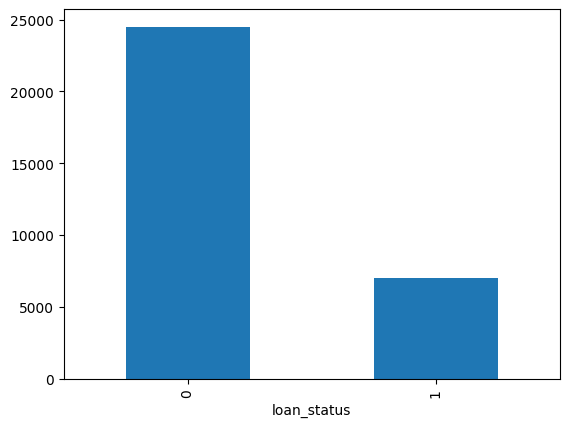

In [ ]:
Y_train.value_counts().plot(kind='bar')
Y_train.value_counts(normalize=True)*100

This data is imbalance and it can lead to a model that performs well on accuracy but poorly on recall/precision for the minority class (which is often more important in such cases).



In [ ]:
Y_test.value_counts(normalize=True)*100

,proportion
loan_status,
0,77.777778
1,22.222222


### Handling imbalanced data using SMOTE

In [ ]:
smote = SMOTE()
X_train_bal, Y_train_bal = smote.fit_resample(X_train_scaled, Y_train)

In [ ]:
Y_train_bal.value_counts(normalize=True)*100
# Now data is completely balance

,proportion
loan_status,
0,50.0
1,50.0


### Train multiple classification models and evaluate their performance using different matrices

In [ ]:
knc_model = KNeighborsClassifier(n_neighbors=5)
knc_model.fit(X_train_bal, Y_train_bal)

KNeighborsClassifier()

In [ ]:
Y_pred = knc_model.predict(X_test_scaled)
Y_pred

array([0, 1, 0, ..., 0, 0, 0])

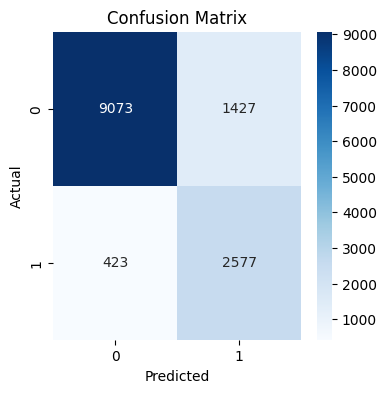

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
res1= classification_report(Y_test, Y_pred)
print(res1)

              precision    recall  f1-score   support

           0       0.96      0.86      0.91     10500
           1       0.64      0.86      0.74      3000

    accuracy                           0.86     13500
   macro avg       0.80      0.86      0.82     13500
weighted avg       0.89      0.86      0.87     13500



In [ ]:
dtc_model = DecisionTreeClassifier(criterion='gini')
dtc_model.fit(X_train_bal, Y_train_bal)

DecisionTreeClassifier()

In [ ]:
Y_pred_dt = dtc_model.predict(X_test_scaled)

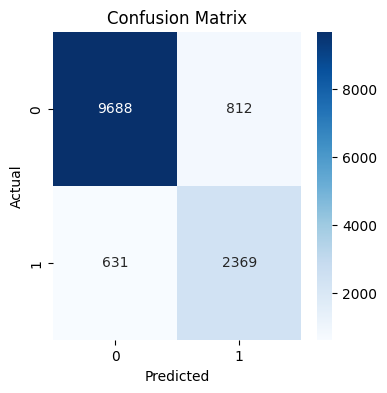

In [ ]:
cm = confusion_matrix(Y_test, Y_pred_dt)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
res2= classification_report(Y_test, Y_pred_dt)
print(res2)

              precision    recall  f1-score   support

           0       0.94      0.92      0.93     10500
           1       0.74      0.79      0.77      3000

    accuracy                           0.89     13500
   macro avg       0.84      0.86      0.85     13500
weighted avg       0.90      0.89      0.89     13500



In [ ]:
svc_model = SVC()
svc_model.fit(X_train_bal, Y_train_bal)

SVC()

In [ ]:
Y_pred_sv = svc_model.predict(X_test_scaled)
Y_pred_sv

array([1, 1, 0, ..., 0, 1, 0])

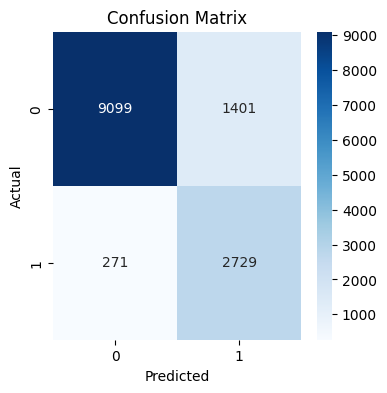

In [ ]:
cm = confusion_matrix(Y_test, Y_pred_sv)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
res3 = classification_report(Y_pred_sv, Y_test)
print(res3)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      9370
           1       0.91      0.66      0.77      4130

    accuracy                           0.88     13500
   macro avg       0.89      0.82      0.84     13500
weighted avg       0.88      0.88      0.87     13500



In [ ]:
NB_model = GaussianNB()
NB_model.fit(X_train_bal, Y_train_bal)

GaussianNB()

In [ ]:
Y_pred_NB = NB_model.predict(X_test_scaled)

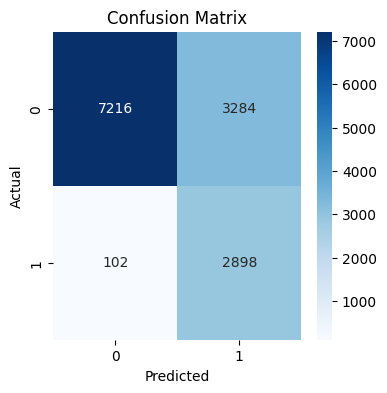

In [ ]:
cm = confusion_matrix(Y_test, Y_pred_NB)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
res4 = classification_report(Y_pred_NB, Y_test)
print(res4)

              precision    recall  f1-score   support

           0       0.69      0.99      0.81      7318
           1       0.97      0.47      0.63      6182

    accuracy                           0.75     13500
   macro avg       0.83      0.73      0.72     13500
weighted avg       0.81      0.75      0.73     13500



In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train_bal, Y_train_bal)

LogisticRegression()

In [ ]:
Y_pred_lr = lr_model.predict(X_test_scaled)
Y_pred_lr

array([1, 1, 0, ..., 0, 1, 0])

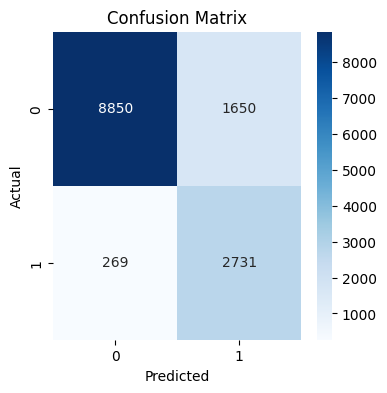

In [ ]:
cm = confusion_matrix(Y_test, Y_pred_lr)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
res5 = classification_report(Y_pred_lr, Y_test)
print(res5)

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      9119
           1       0.91      0.62      0.74      4381

    accuracy                           0.86     13500
   macro avg       0.88      0.80      0.82     13500
weighted avg       0.86      0.86      0.85     13500



In [ ]:
rf_model = RandomForestClassifier(criterion='entropy',n_estimators=22, random_state=42)
rf_model.fit(X_train_bal, Y_train_bal)

RandomForestClassifier(criterion='entropy', n_estimators=22, random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_model, X_train_bal, Y_train_bal, cv=5)
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())
print("Standard deviation:", scores.std())

Cross-validation scores: [0.91346939 0.94030612 0.95193878 0.95571429 0.95510204]
Mean accuracy: 0.9433061224489796
Standard deviation: 0.015917660894842017


In [ ]:
Y_pred_rf = rf_model.predict(X_test_scaled)
Y_pred_rf

array([0, 1, 0, ..., 0, 0, 0])

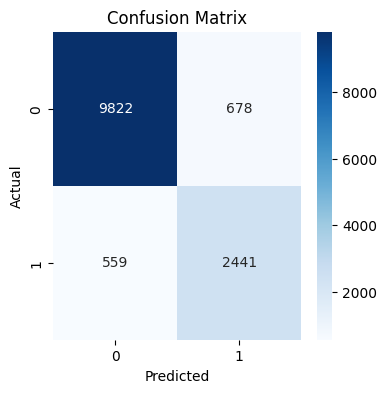

In [ ]:
cm = confusion_matrix(Y_test, Y_pred_rf)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
res6 = classification_report(Y_pred_rf, Y_test)
print(res6)

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     10381
           1       0.81      0.78      0.80      3119

    accuracy                           0.91     13500
   macro avg       0.87      0.86      0.87     13500
weighted avg       0.91      0.91      0.91     13500



# Final Conclusion:

I performed data cleaning, handled outliers, and encoded categorical variables.\
Scaled the numeric features based on their distribution (normal/skewed).\
Dealt with class imbalance using oversampling.\
Trained and compared 6 models: KNN, Decision Tree, SVM, Naive Bayes, Logistic Regression, Random Forest \

\
Random Forest gave the best performance with:\
Accuracy: 91%\
F1-score : 0.80
Also this is neither overfit nor underfit there is ~3.7% difference between training and  testing accuracy which is not that much we can optimize it furthere by doing feature selection HPO and ensemble learning


\
I learned the importance of class balancing and choosing the right evaluation metric (F1-score).

In the future, I can improve this by doing hyperparameter tuning and also use the boosting or baggning techniques

